In [1]:
%%time
import warnings   
warnings.filterwarnings('ignore')

import datatable as dt
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

Wall time: 1.04 s


use datatable to fast load the dataset

In [80]:
%%time
train = dt.fread('train.csv').to_pandas()

pd.set_option('display.max_columns', None)
train.head(3)

Wall time: 205 ms


,UNIQUEID,DISBURSED_AMOUNT,ASSET_COST,LTV,BRANCH_ID,SUPPLIER_ID,MANUFACTURER_ID,CURRENT_PINCODE_ID,DATE_OF_BIRTH,EMPLOYMENT_TYPE,DISBURSAL_DATE,STATE_ID,EMPLOYEE_CODE_ID,MOBILENO_AVL_FLAG,AADHAR_FLAG,PAN_FLAG,VOTERID_FLAG,DRIVING_FLAG,PASSPORT_FLAG,PERFORM_CNS_SCORE,PERFORM_CNS_SCORE_DESCRIPTION,PRI_NO_OF_ACCTS,PRI_ACTIVE_ACCTS,PRI_OVERDUE_ACCTS,PRI_CURRENT_BALANCE,PRI_SANCTIONED_AMOUNT,PRI_DISBURSED_AMOUNT,SEC_NO_OF_ACCTS,SEC_ACTIVE_ACCTS,SEC_OVERDUE_ACCTS,SEC_CURRENT_BALANCE,SEC_SANCTIONED_AMOUNT,SEC_DISBURSED_AMOUNT,PRIMARY_INSTAL_AMT,SEC_INSTAL_AMT,NEW_ACCTS_IN_LAST_SIX_MONTHS,DELINQUENT_ACCTS_IN_LAST_SIX_MONTHS,AVERAGE_ACCT_AGE,CREDIT_HISTORY_LENGTH,NO_OF_INQUIRIES,LOAN_DEFAULT
0,420825,50578,58400,89.55,67,22807,45,1441,01-01-1984,Salaried,03-08-2018,6,1998,True,True,False,False,False,False,0,No Bureau History Available,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,False
1,537409,47145,65550,73.23,67,22807,45,1502,31-07-1985,Self employed,26-09-2018,6,1998,True,True,False,False,False,False,598,I-Medium Risk,1,1,1,27600,50200,50200,0,0,0,0,0,0,1991,0,0,1,1yrs 11mon,1yrs 11mon,0,True
2,417566,53278,61360,89.63,67,22807,45,1497,24-08-1985,Self employed,01-08-2018,6,1998,True,True,False,False,False,False,0,No Bureau History Available,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,False


In [81]:
# drop ID columns and passwords
train.drop(columns = ['UNIQUEID', 'EMPLOYEE_CODE_ID', 'CURRENT_PINCODE_ID', 'BRANCH_ID', 'SUPPLIER_ID', 'MANUFACTURER_ID'], inplace = True)
print('Name of columns:', list(train.columns))

Name of columns: ['DISBURSED_AMOUNT', 'ASSET_COST', 'LTV', 'DATE_OF_BIRTH', 'EMPLOYMENT_TYPE', 'DISBURSAL_DATE', 'STATE_ID', 'MOBILENO_AVL_FLAG', 'AADHAR_FLAG', 'PAN_FLAG', 'VOTERID_FLAG', 'DRIVING_FLAG', 'PASSPORT_FLAG', 'PERFORM_CNS_SCORE', 'PERFORM_CNS_SCORE_DESCRIPTION', 'PRI_NO_OF_ACCTS', 'PRI_ACTIVE_ACCTS', 'PRI_OVERDUE_ACCTS', 'PRI_CURRENT_BALANCE', 'PRI_SANCTIONED_AMOUNT', 'PRI_DISBURSED_AMOUNT', 'SEC_NO_OF_ACCTS', 'SEC_ACTIVE_ACCTS', 'SEC_OVERDUE_ACCTS', 'SEC_CURRENT_BALANCE', 'SEC_SANCTIONED_AMOUNT', 'SEC_DISBURSED_AMOUNT', 'PRIMARY_INSTAL_AMT', 'SEC_INSTAL_AMT', 'NEW_ACCTS_IN_LAST_SIX_MONTHS', 'DELINQUENT_ACCTS_IN_LAST_SIX_MONTHS', 'AVERAGE_ACCT_AGE', 'CREDIT_HISTORY_LENGTH', 'NO_OF_INQUIRIES', 'LOAN_DEFAULT']


In [82]:
from datetime import datetime, date
    
# This function converts given date to age
def age(born):
    born = datetime.strptime(born, "%d-%m-%Y").date()
    today = date.today()
    return today.year - born.year - ((today.month, 
                                      today.day) < (born.month, 
                                                    born.day))
  
for i in train[['DATE_OF_BIRTH', 'DISBURSAL_DATE']].columns:
    train[i] = train[i].apply(age)

In [83]:
train.rename(columns = {'DATE_OF_BIRTH':'Age', 'DISBURSAL_DATE':'DISBURSAL Years'}, inplace=True)
train.head(3)

,DISBURSED_AMOUNT,ASSET_COST,LTV,Age,EMPLOYMENT_TYPE,DISBURSAL Years,STATE_ID,MOBILENO_AVL_FLAG,AADHAR_FLAG,PAN_FLAG,VOTERID_FLAG,DRIVING_FLAG,PASSPORT_FLAG,PERFORM_CNS_SCORE,PERFORM_CNS_SCORE_DESCRIPTION,PRI_NO_OF_ACCTS,PRI_ACTIVE_ACCTS,PRI_OVERDUE_ACCTS,PRI_CURRENT_BALANCE,PRI_SANCTIONED_AMOUNT,PRI_DISBURSED_AMOUNT,SEC_NO_OF_ACCTS,SEC_ACTIVE_ACCTS,SEC_OVERDUE_ACCTS,SEC_CURRENT_BALANCE,SEC_SANCTIONED_AMOUNT,SEC_DISBURSED_AMOUNT,PRIMARY_INSTAL_AMT,SEC_INSTAL_AMT,NEW_ACCTS_IN_LAST_SIX_MONTHS,DELINQUENT_ACCTS_IN_LAST_SIX_MONTHS,AVERAGE_ACCT_AGE,CREDIT_HISTORY_LENGTH,NO_OF_INQUIRIES,LOAN_DEFAULT
0,50578,58400,89.55,38,Salaried,3,6,True,True,False,False,False,False,0,No Bureau History Available,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,False
1,47145,65550,73.23,36,Self employed,3,6,True,True,False,False,False,False,598,I-Medium Risk,1,1,1,27600,50200,50200,0,0,0,0,0,0,1991,0,0,1,1yrs 11mon,1yrs 11mon,0,True
2,53278,61360,89.63,36,Self employed,3,6,True,True,False,False,False,False,0,No Bureau History Available,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,False


convert two datastamp columns to years

In [6]:
train[['AVERAGE_ACCT_Yr','AVERAGE_ACCT_Month']] = train['AVERAGE_ACCT_AGE'].str.split("yrs",expand=True)
train[['AVERAGE_ACCT_Month','AVERAGE_ACCT_Month1']] = train['AVERAGE_ACCT_Month'].str.split("mon",expand=True)
train["AVERAGE_ACCT_AGE"]= train["AVERAGE_ACCT_Yr"].astype(str).astype(int)+((train["AVERAGE_ACCT_Month"].astype(str).astype(int))/12)
train= train.drop(columns= ["AVERAGE_ACCT_Yr","AVERAGE_ACCT_Month",'AVERAGE_ACCT_Month1'])
train[['CREDIT_HISTORY_LENGTH_Yr','CREDIT_HISTORY_LENGTH_Month']] = train['CREDIT_HISTORY_LENGTH'].str.split("yrs",expand=True)
train[['CREDIT_HISTORY_LENGTH_Month','CREDIT_HISTORY_LENGTH_Month1']] = train['CREDIT_HISTORY_LENGTH_Month'].str.split("mon",expand=True)
train["CREDIT_HISTORY_LENGTH"]= train["CREDIT_HISTORY_LENGTH_Yr"].astype(str).astype(int)+((train["CREDIT_HISTORY_LENGTH_Month"].astype(str).astype(int))/12)
train= train.drop(columns= ["CREDIT_HISTORY_LENGTH_Yr","CREDIT_HISTORY_LENGTH_Month",'CREDIT_HISTORY_LENGTH_Month1'])

cut the two string columns into numeric columns that indicates the time

In [7]:
train.describe()

,DISBURSED_AMOUNT,ASSET_COST,LTV,Age,DISBURSAL Years,STATE_ID,PERFORM_CNS_SCORE,PRI_NO_OF_ACCTS,PRI_ACTIVE_ACCTS,PRI_OVERDUE_ACCTS,PRI_CURRENT_BALANCE,PRI_SANCTIONED_AMOUNT,PRI_DISBURSED_AMOUNT,SEC_NO_OF_ACCTS,SEC_ACTIVE_ACCTS,SEC_OVERDUE_ACCTS,SEC_CURRENT_BALANCE,SEC_SANCTIONED_AMOUNT,SEC_DISBURSED_AMOUNT,PRIMARY_INSTAL_AMT,SEC_INSTAL_AMT,NEW_ACCTS_IN_LAST_SIX_MONTHS,DELINQUENT_ACCTS_IN_LAST_SIX_MONTHS,AVERAGE_ACCT_AGE,CREDIT_HISTORY_LENGTH,NO_OF_INQUIRIES
count,233154.000000,2.331540e+05,233154.000000,233154.000000,233154.0,233154.000000,233154.000000,233154.000000,233154.000000,233154.000000,2.331540e+05,2.331540e+05,2.331540e+05,233154.000000,233154.000000,233154.000000,2.331540e+05,2.331540e+05,2.331540e+05,2.331540e+05,2.331540e+05,233154.000000,233154.000000,233154.000000,233154.000000,233154.000000
mean,54356.993528,7.586507e+04,74.746530,37.508016,3.0,7.262243,289.462994,2.440636,1.039896,0.156549,1.659001e+05,2.185039e+05,2.180659e+05,0.059081,0.027703,0.007244,5.427793e+03,7.295923e+03,7.179998e+03,1.310548e+04,3.232684e+02,0.381833,0.097481,0.742980,1.354367,0.206615
std,12971.314171,1.894478e+04,11.456636,9.834623,0.0,4.482230,338.374779,5.217233,1.941496,0.548787,9.422736e+05,2.374794e+06,2.377744e+06,0.626795,0.316057,0.111079,1.702370e+05,1.831560e+05,1.825925e+05,1.513679e+05,1.555369e+04,0.955107,0.384439,1.258868,2.381771,0.706498
min,13320.000000,3.700000e+04,10.030000,21.000000,3.0,1.000000,0.000000,0.000000,0.000000,0.000000,-6.678296e+06,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,-5.746470e+05,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47145.000000,6.571700e+04,68.880000,29.000000,3.0,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
50%,53803.000000,7.094600e+04,76.800000,36.000000,3.0,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
75%,60413.000000,7.920175e+04,83.670000,44.000000,3.0,10.000000,678.000000,3.000000,1.000000,0.000000,3.500650e+04,6.250000e+04,6.080000e+04,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,1.999000e+03,0.000000e+00,0.000000,0.000000,1.083333,2.000000,0.000000
max,990572.000000,1.628992e+06,95.000000,72.000000,3.0,22.000000,890.000000,453.000000,144.000000,25.000000,9.652492e+07,1.000000e+09,1.000000e+09,52.000000,36.000000,8.000000,3.603285e+07,3.000000e+07,3.000000e+07,2.564281e+07,4.170901e+06,35.000000,20.000000,30.750000,39.000000,36.000000


In [8]:
# check if there is missing value in any column
train[train.columns[train.isnull().any()]].isnull().sum()

Series([], dtype: float64)

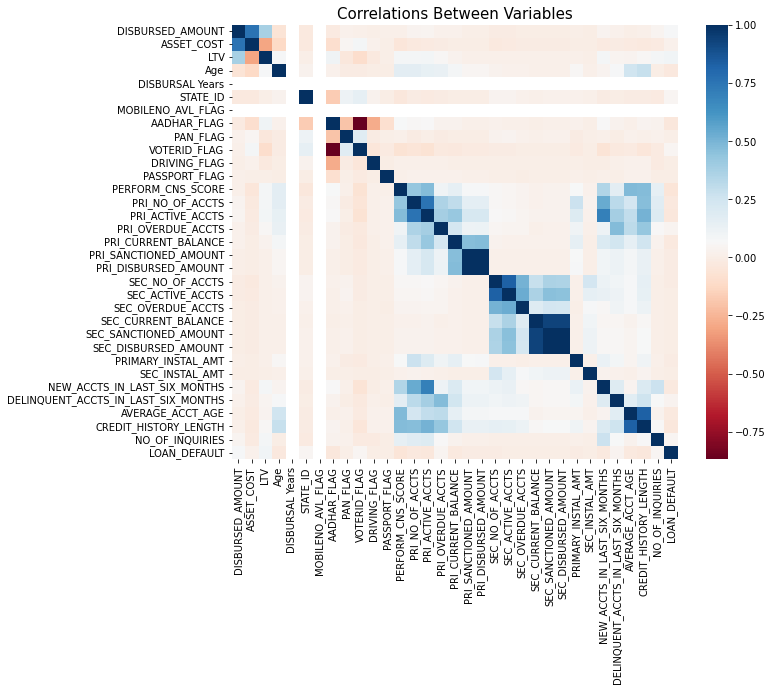

In [9]:
plt.figure(figsize=(10,8))
sns.heatmap(train.corr(), cmap="RdBu")
plt.title("Correlations Between Variables", size=15)
plt.show()

Most variables are not highly correlated.

In [10]:
train['LOAN_DEFAULT'] = np.where((train.LOAN_DEFAULT == False), 0, train.LOAN_DEFAULT)
train['LOAN_DEFAULT'] = np.where((train.LOAN_DEFAULT == True), 1, train.LOAN_DEFAULT)
train.head()
# change the outcome variable into numeric binary form

,DISBURSED_AMOUNT,ASSET_COST,LTV,Age,EMPLOYMENT_TYPE,DISBURSAL Years,STATE_ID,MOBILENO_AVL_FLAG,AADHAR_FLAG,PAN_FLAG,VOTERID_FLAG,DRIVING_FLAG,PASSPORT_FLAG,PERFORM_CNS_SCORE,PERFORM_CNS_SCORE_DESCRIPTION,PRI_NO_OF_ACCTS,PRI_ACTIVE_ACCTS,PRI_OVERDUE_ACCTS,PRI_CURRENT_BALANCE,PRI_SANCTIONED_AMOUNT,PRI_DISBURSED_AMOUNT,SEC_NO_OF_ACCTS,SEC_ACTIVE_ACCTS,SEC_OVERDUE_ACCTS,SEC_CURRENT_BALANCE,SEC_SANCTIONED_AMOUNT,SEC_DISBURSED_AMOUNT,PRIMARY_INSTAL_AMT,SEC_INSTAL_AMT,NEW_ACCTS_IN_LAST_SIX_MONTHS,DELINQUENT_ACCTS_IN_LAST_SIX_MONTHS,AVERAGE_ACCT_AGE,CREDIT_HISTORY_LENGTH,NO_OF_INQUIRIES,LOAN_DEFAULT
0,50578,58400,89.55,38,Salaried,3,6,True,True,False,False,False,False,0,No Bureau History Available,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.000000,0.000000,0,0
1,47145,65550,73.23,36,Self employed,3,6,True,True,False,False,False,False,598,I-Medium Risk,1,1,1,27600,50200,50200,0,0,0,0,0,0,1991,0,0,1,1.916667,1.916667,0,1
2,53278,61360,89.63,36,Self employed,3,6,True,True,False,False,False,False,0,No Bureau History Available,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.000000,0.000000,0,0
3,57513,66113,88.48,28,Self employed,3,6,True,True,False,False,False,False,305,L-Very High Risk,3,0,0,0,0,0,0,0,0,0,0,0,31,0,0,0,0.666667,1.250000,1,1
4,52378,60300,88.39,44,Self employed,3,6,True,True,False,False,False,False,0,No Bureau History Available,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.000000,0.000000,1,1


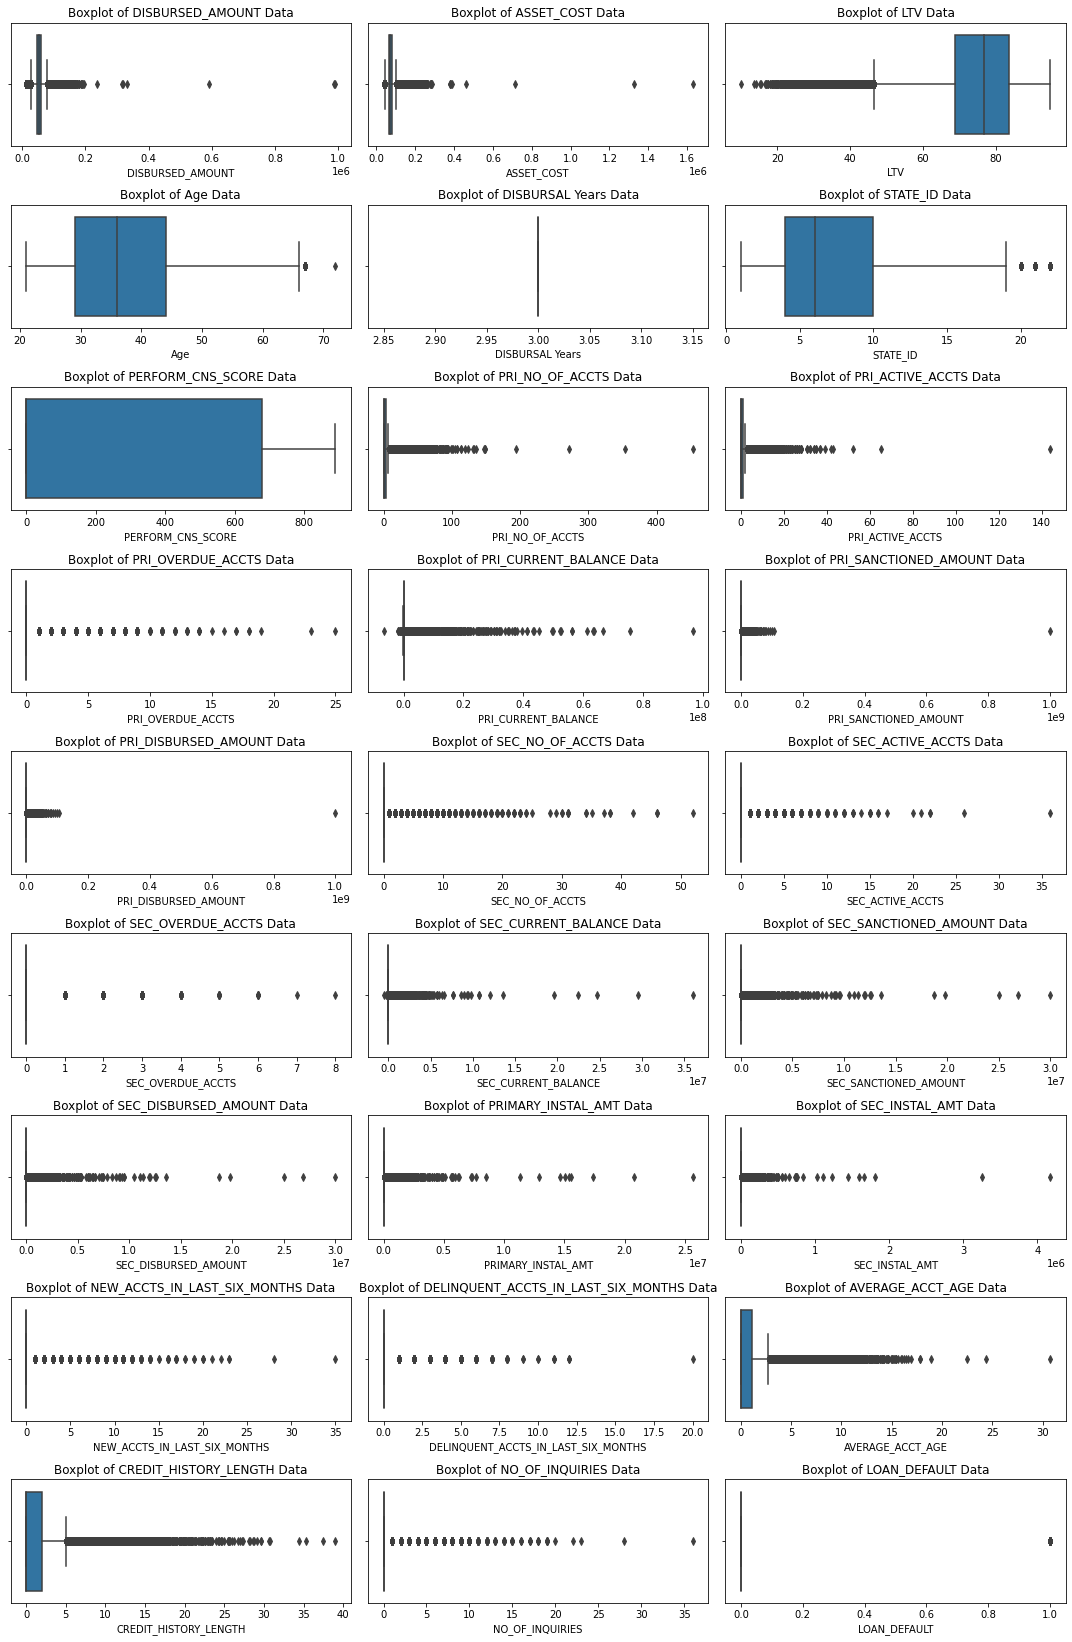

In [11]:
df_numeric = train.select_dtypes(include = np.number)
plt.figure(figsize=(15,25))
for i,col in enumerate(df_numeric.columns,1):
    plt.subplot(10,3,i)
    plt.title(f"Boxplot of {col} Data")
    sns.boxplot(train[col])
    plt.tight_layout()
    plt.plot()

# use boxplot to further investigate the numerical variables

Standardize the dataset

In [12]:
from sklearn.preprocessing import StandardScaler
scaler_data = StandardScaler() 
def scaleColumns(df, cols_to_scale):

    for col in cols_to_scale:

        df[col] = pd.DataFrame(scaler_data.fit_transform(pd.DataFrame(train[col])),columns=[col])

    return df

train = scaleColumns(train,['PERFORM_CNS_SCORE','PRI_ACTIVE_ACCTS', 'PRI_CURRENT_BALANCE', 
                                 'PRI_DISBURSED_AMOUNT', 'SEC_NO_OF_ACCTS', 'SEC_OVERDUE_ACCTS', 
                                 'SEC_CURRENT_BALANCE', 'PRIMARY_INSTAL_AMT', 'SEC_INSTAL_AMT',
                                 'DELINQUENT_ACCTS_IN_LAST_SIX_MONTHS', 'CREDIT_HISTORY_LENGTH', 
                                 'NO_OF_INQUIRIES', 'Age', 'DISBURSAL Years'])

train.head()

,DISBURSED_AMOUNT,ASSET_COST,LTV,Age,EMPLOYMENT_TYPE,DISBURSAL Years,STATE_ID,MOBILENO_AVL_FLAG,AADHAR_FLAG,PAN_FLAG,VOTERID_FLAG,DRIVING_FLAG,PASSPORT_FLAG,PERFORM_CNS_SCORE,PERFORM_CNS_SCORE_DESCRIPTION,PRI_NO_OF_ACCTS,PRI_ACTIVE_ACCTS,PRI_OVERDUE_ACCTS,PRI_CURRENT_BALANCE,PRI_SANCTIONED_AMOUNT,PRI_DISBURSED_AMOUNT,SEC_NO_OF_ACCTS,SEC_ACTIVE_ACCTS,SEC_OVERDUE_ACCTS,SEC_CURRENT_BALANCE,SEC_SANCTIONED_AMOUNT,SEC_DISBURSED_AMOUNT,PRIMARY_INSTAL_AMT,SEC_INSTAL_AMT,NEW_ACCTS_IN_LAST_SIX_MONTHS,DELINQUENT_ACCTS_IN_LAST_SIX_MONTHS,AVERAGE_ACCT_AGE,CREDIT_HISTORY_LENGTH,NO_OF_INQUIRIES,LOAN_DEFAULT
0,50578,58400,89.55,0.050026,Salaried,0.0,6,True,True,False,False,False,False,-0.855453,No Bureau History Available,0,-0.535617,0,-0.176064,0,-0.091711,-0.094259,0,-0.065216,-0.031884,0,0,-0.086581,-0.020784,0,-0.253566,0.000000,-0.568640,-0.292450,0
1,47145,65550,73.23,-0.153338,Self employed,0.0,6,True,True,False,False,False,False,0.911822,I-Medium Risk,1,-0.020549,1,-0.146773,50200,-0.070599,-0.094259,0,-0.065216,-0.031884,0,0,-0.073427,-0.020784,0,2.347632,1.916667,0.236085,-0.292450,1
2,53278,61360,89.63,-0.153338,Self employed,0.0,6,True,True,False,False,False,False,-0.855453,No Bureau History Available,0,-0.535617,0,-0.176064,0,-0.091711,-0.094259,0,-0.065216,-0.031884,0,0,-0.086581,-0.020784,0,-0.253566,0.000000,-0.568640,-0.292450,0
3,57513,66113,88.48,-0.966792,Self employed,0.0,6,True,True,False,False,False,False,0.045917,L-Very High Risk,3,-0.535617,0,-0.176064,0,-0.091711,-0.094259,0,-0.065216,-0.031884,0,0,-0.086376,-0.020784,0,-0.253566,0.666667,-0.043819,1.122986,1
4,52378,60300,88.39,0.660117,Self employed,0.0,6,True,True,False,False,False,False,-0.855453,No Bureau History Available,0,-0.535617,0,-0.176064,0,-0.091711,-0.094259,0,-0.065216,-0.031884,0,0,-0.086581,-0.020784,0,-0.253566,0.000000,-0.568640,1.122986,1


In [13]:
# create dummy variables for the categorical variables
train_dummy = pd.get_dummies(train, prefix_sep='_', drop_first=True)
train_dummy.columns

Index(['DISBURSED_AMOUNT', 'ASSET_COST', 'LTV', 'Age', 'DISBURSAL Years',
       'STATE_ID', 'MOBILENO_AVL_FLAG', 'AADHAR_FLAG', 'PAN_FLAG',
       'VOTERID_FLAG', 'DRIVING_FLAG', 'PASSPORT_FLAG', 'PERFORM_CNS_SCORE',
       'PRI_NO_OF_ACCTS', 'PRI_ACTIVE_ACCTS', 'PRI_OVERDUE_ACCTS',
       'PRI_CURRENT_BALANCE', 'PRI_SANCTIONED_AMOUNT', 'PRI_DISBURSED_AMOUNT',
       'SEC_NO_OF_ACCTS', 'SEC_ACTIVE_ACCTS', 'SEC_OVERDUE_ACCTS',
       'SEC_CURRENT_BALANCE', 'SEC_SANCTIONED_AMOUNT', 'SEC_DISBURSED_AMOUNT',
       'PRIMARY_INSTAL_AMT', 'SEC_INSTAL_AMT', 'NEW_ACCTS_IN_LAST_SIX_MONTHS',
       'DELINQUENT_ACCTS_IN_LAST_SIX_MONTHS', 'AVERAGE_ACCT_AGE',
       'CREDIT_HISTORY_LENGTH', 'NO_OF_INQUIRIES', 'LOAN_DEFAULT',
       'EMPLOYMENT_TYPE_Salaried', 'EMPLOYMENT_TYPE_Self employed',
       'PERFORM_CNS_SCORE_DESCRIPTION_B-Very Low Risk',
       'PERFORM_CNS_SCORE_DESCRIPTION_C-Very Low Risk',
       'PERFORM_CNS_SCORE_DESCRIPTION_D-Very Low Risk',
       'PERFORM_CNS_SCORE_DESCRIPTION_E-Lo

In [14]:
feature = ['DISBURSED_AMOUNT', 'ASSET_COST', 'LTV', 'Age', 'DISBURSAL Years',
       'STATE_ID', 'MOBILENO_AVL_FLAG', 'AADHAR_FLAG', 'PAN_FLAG',
       'VOTERID_FLAG', 'DRIVING_FLAG', 'PASSPORT_FLAG', 'PERFORM_CNS_SCORE',
       'PRI_NO_OF_ACCTS', 'PRI_ACTIVE_ACCTS', 'PRI_OVERDUE_ACCTS',
       'PRI_CURRENT_BALANCE', 'PRI_SANCTIONED_AMOUNT', 'PRI_DISBURSED_AMOUNT',
       'SEC_NO_OF_ACCTS', 'SEC_ACTIVE_ACCTS', 'SEC_OVERDUE_ACCTS',
       'SEC_CURRENT_BALANCE', 'SEC_SANCTIONED_AMOUNT', 'SEC_DISBURSED_AMOUNT',
       'PRIMARY_INSTAL_AMT', 'SEC_INSTAL_AMT', 'NEW_ACCTS_IN_LAST_SIX_MONTHS',
       'DELINQUENT_ACCTS_IN_LAST_SIX_MONTHS', 'AVERAGE_ACCT_AGE',
       'CREDIT_HISTORY_LENGTH', 'NO_OF_INQUIRIES',
       'EMPLOYMENT_TYPE_Salaried', 'EMPLOYMENT_TYPE_Self employed',
       'PERFORM_CNS_SCORE_DESCRIPTION_B-Very Low Risk',
       'PERFORM_CNS_SCORE_DESCRIPTION_C-Very Low Risk',
       'PERFORM_CNS_SCORE_DESCRIPTION_D-Very Low Risk',
       'PERFORM_CNS_SCORE_DESCRIPTION_E-Low Risk',
       'PERFORM_CNS_SCORE_DESCRIPTION_F-Low Risk',
       'PERFORM_CNS_SCORE_DESCRIPTION_G-Low Risk',
       'PERFORM_CNS_SCORE_DESCRIPTION_H-Medium Risk',
       'PERFORM_CNS_SCORE_DESCRIPTION_I-Medium Risk',
       'PERFORM_CNS_SCORE_DESCRIPTION_J-High Risk',
       'PERFORM_CNS_SCORE_DESCRIPTION_K-High Risk',
       'PERFORM_CNS_SCORE_DESCRIPTION_L-Very High Risk',
       'PERFORM_CNS_SCORE_DESCRIPTION_M-Very High Risk',
       'PERFORM_CNS_SCORE_DESCRIPTION_No Bureau History Available',
       'PERFORM_CNS_SCORE_DESCRIPTION_Not Scored: More than 50 active Accounts found',
       'PERFORM_CNS_SCORE_DESCRIPTION_Not Scored: No Activity seen on the customer (Inactive)',
       'PERFORM_CNS_SCORE_DESCRIPTION_Not Scored: No Updates available in last 36 months',
       'PERFORM_CNS_SCORE_DESCRIPTION_Not Scored: Not Enough Info available on the customer',
       'PERFORM_CNS_SCORE_DESCRIPTION_Not Scored: Only a Guarantor',
       'PERFORM_CNS_SCORE_DESCRIPTION_Not Scored: Sufficient History Not Available']
X = train_dummy[feature]
Y  = train_dummy['LOAN_DEFAULT']

Use Boruta-shap function, combines the bortuta feature selection algorithm with shapley values to pick the features for our model, catboosting was combined for faster computating purpose.

In [18]:
# Use catboost model to perform Boruta feature selection algorithm
from BorutaShap import BorutaShap
from catboost import CatBoostClassifier
model = CatBoostClassifier(task_type="GPU")


feature_selector = BorutaShap(model = model, importance_measure = 'shap', classification=True)
feature_selector.fit(X = train_dummy[feature], y = train_dummy['LOAN_DEFAULT'], n_trials= 100)

100%|██████████| 100/100 [25:16<00:00, 15.16s/it]

23 attributes confirmed important: ['PRI_CURRENT_BALANCE', 'DISBURSED_AMOUNT', 'Age', 'NEW_ACCTS_IN_LAST_SIX_MONTHS', 'NO_OF_INQUIRIES', 'AADHAR_FLAG', 'EMPLOYMENT_TYPE_Salaried', 'PRI_ACTIVE_ACCTS', 'STATE_ID', 'PRI_SANCTIONED_AMOUNT', 'PERFORM_CNS_SCORE_DESCRIPTION_M-Very High Risk', 'CREDIT_HISTORY_LENGTH', 'ASSET_COST', 'PERFORM_CNS_SCORE', 'PRI_OVERDUE_ACCTS', 'LTV', 'DELINQUENT_ACCTS_IN_LAST_SIX_MONTHS', 'PRIMARY_INSTAL_AMT', 'PAN_FLAG', 'PRI_NO_OF_ACCTS', 'EMPLOYMENT_TYPE_Self employed', 'PRI_DISBURSED_AMOUNT', 'VOTERID_FLAG']
30 attributes confirmed unimportant: ['AVERAGE_ACCT_AGE', 'PERFORM_CNS_SCORE_DESCRIPTION_H-Medium Risk', 'SEC_SANCTIONED_AMOUNT', 'SEC_DISBURSED_AMOUNT', 'PERFORM_CNS_SCORE_DESCRIPTION_I-Medium Risk', 'PERFORM_CNS_SCORE_DESCRIPTION_J-High Risk', 'PERFORM_CNS_SCORE_DESCRIPTION_G-Low Risk', 'PERFORM_CNS_SCORE_DESCRIPTION_E-Low Risk', 'PERFORM_CNS_SCORE_DESCRIPTION_K-High Risk', 'PERFORM_CNS_SCORE_DESCRIPTION_Not Scored: Not Enough Info available on the custo

23 features are confirmed important, 30 other attributes are abandoned. Catboosting with GPU task tpye reduced the training time to 24 minutes for a dataset with 233 thousand rows and 53 columns.

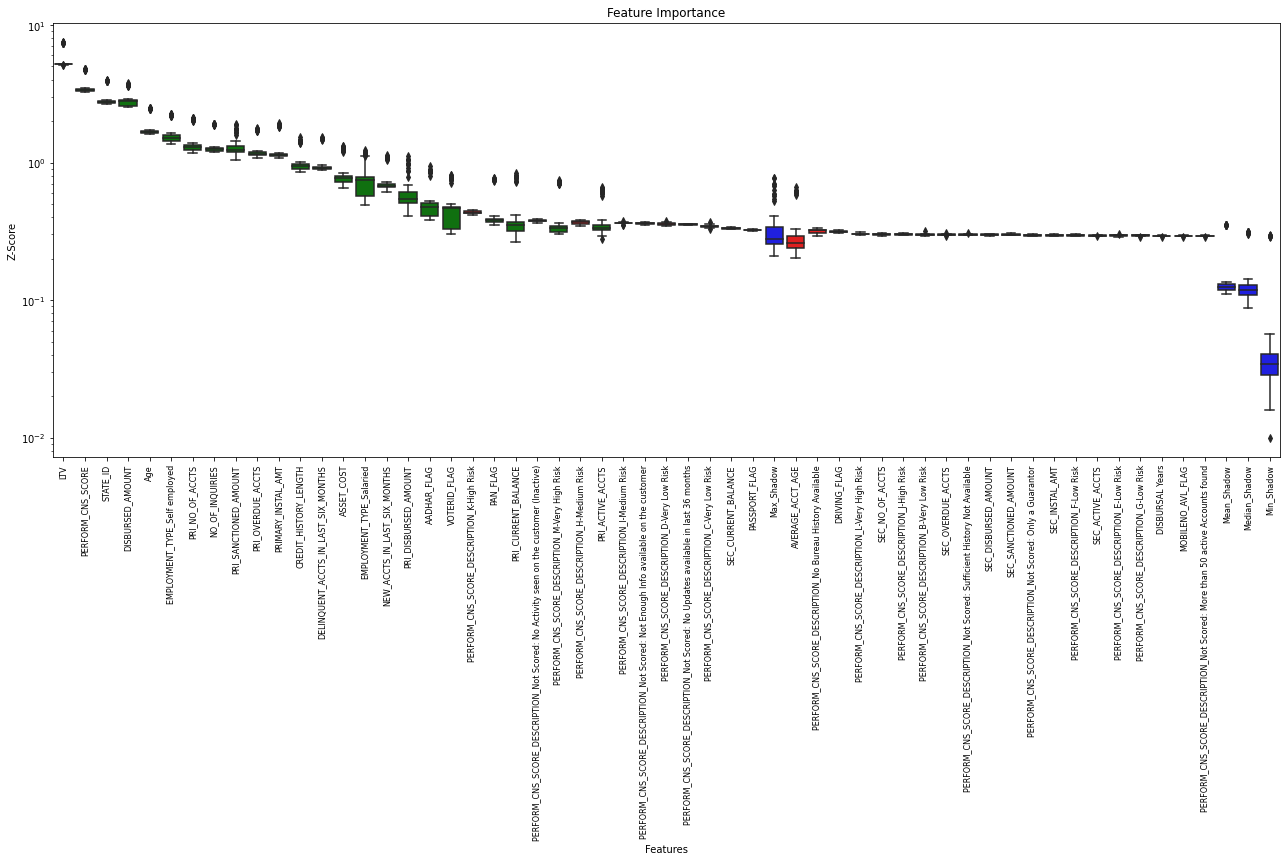

In [19]:
# plot features based their importance
feature_selector.plot(which_features='all', figsize=(22,8))

In [20]:
features = ['DISBURSED_AMOUNT', 'AADHAR_FLAG', 'CREDIT_HISTORY_LENGTH', 'Age', 'PRI_NO_OF_ACCTS', 'VOTERID_FLAG', 'PAN_FLAG', 'ASSET_COST', 'PRI_SANCTIONED_AMOUNT', 'NO_OF_INQUIRIES', 'DELINQUENT_ACCTS_IN_LAST_SIX_MONTHS', 'PRIMARY_INSTAL_AMT', 'PRI_ACTIVE_ACCTS', 'PRI_OVERDUE_ACCTS', 'PRI_DISBURSED_AMOUNT', 'LTV', 'EMPLOYMENT_TYPE_Salaried', 'NEW_ACCTS_IN_LAST_SIX_MONTHS', 'PERFORM_CNS_SCORE', 'EMPLOYMENT_TYPE_Self employed', 'PERFORM_CNS_SCORE_DESCRIPTION_M-Very High Risk', 'STATE_ID', 'PRI_CURRENT_BALANCE']

In [56]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(train_dummy[features], train_dummy['LOAN_DEFAULT'], test_size = 0.2)

from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression() 
logmodel.fit(X_train,y_train)
logpred = logmodel.predict(X_test)

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

print(confusion_matrix(y_test, logpred))
print(classification_report(y_test, logpred))

[[36438     0]
 [10193     0]]
              precision    recall  f1-score   support

           0       0.78      1.00      0.88     36438
           1       0.00      0.00      0.00     10193

    accuracy                           0.78     46631
   macro avg       0.39      0.50      0.44     46631
weighted avg       0.61      0.78      0.69     46631



Accuracy inherited the precision of 0 (since y_train has way more 0 than 1), however, our target should be precision of 1, since our target is to maximize the predictive power of revealing customers that would default their loan instead of 'will not'. I will use other ML models to acheive it, and oversampling method to maximize the precision of 1.

In [21]:
# use xgboost algorithm to predict the outcome
from xgboost import XGBClassifier

# train model
xgb = XGBClassifier().fit(X_train[features], y_train)

# predict on test set
xgb_pred = xgb.predict(X_test[features])
print(confusion_matrix(y_test, xgb_pred))
print(round(accuracy_score(y_test, xgb_pred),2)*100)
print(classification_report(y_test, xgb_pred))

[20:55:12] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[[45357   342]
 [12326   264]]
78.0
              precision    recall  f1-score   support

           0       0.79      0.99      0.88     45699
           1       0.44      0.02      0.04     12590

    accuracy                           0.78     58289
   macro avg       0.61      0.51      0.46     58289
weighted avg       0.71      0.78      0.70     58289



In [22]:
train_dummy.LOAN_DEFAULT.value_counts()

0    182543
1     50611
Name: LOAN_DEFAULT, dtype: int64

xgboost classifer increased the precision of 1 to 44%, (was 0 by logistic). Now I will perform oversampling to increase the precison of 1

In [23]:
from imblearn.over_sampling import SMOTE
# setting up testing and training sets
sm = SMOTE()
X_train, y_train = sm.fit_resample(train_dummy[features], train_dummy['LOAN_DEFAULT'])

In [24]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size = 0.2)

In [51]:
from xgboost import XGBClassifier
from sklearn.metrics import classification_report , confusion_matrix , accuracy_score

model_xg = XGBClassifier()
model_xg.fit(X_train, y_train)
xgb_pred = model_xg.predict(X_test)


print(classification_report(xgb_pred, y_test))
accuracy_score(xgb_pred, y_test)

[22:18:44] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
              precision    recall  f1-score   support

           0       0.98      0.78      0.87     45796
           1       0.72      0.97      0.83     27222

    accuracy                           0.85     73018
   macro avg       0.85      0.88      0.85     73018
weighted avg       0.88      0.85      0.85     73018



0.8509682544030239

Precision of predicting '1' - customer default on their loan increased from 61% -> 72% by 11%, recall of predicting 1 also increased from 2% to 97% (95%)

In [31]:
from eli5.sklearn import PermutationImportance
import eli5
xgb_model = model_xg.fit(X_train, y_train)
perm = PermutationImportance(xgb_model, random_state=1).fit(X_train, y_train)
eli5.show_weights(perm, feature_names = X_train.columns.tolist())

[20:58:37] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


Weight,Feature
0.1625 ± 0.0010,Age
0.1248 ± 0.0010,PRI_NO_OF_ACCTS
0.1138 ± 0.0006,PERFORM_CNS_SCORE
0.0876 ± 0.0006,EMPLOYMENT_TYPE_Salaried
0.0809 ± 0.0006,EMPLOYMENT_TYPE_Self employed
0.0333 ± 0.0010,NO_OF_INQUIRIES
0.0286 ± 0.0005,VOTERID_FLAG
0.0258 ± 0.0002,AADHAR_FLAG
0.0196 ± 0.0004,DELINQUENT_ACCTS_IN_LAST_SIX_MONTHS
0.0186 ± 0.0006,PRI_ACTIVE_ACCTS


Most important features are:
1. age
2. count of total loans taken by the customer at hte time of disbursement
3. bereau score
4. employment type

Now I use optuna to optimize the hyperparameter for catboost classifer.

In [60]:
%%time

import optuna

sm = SMOTE()
X_smote, y_smote = sm.fit_resample(train_dummy[features], train_dummy['LOAN_DEFAULT'])

def objective(trial):
    X= X_smote
    y= y_smote
    categorical_features_indices = np.where(X.dtypes != np.float)[0]
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    param = {
        "objective": trial.suggest_categorical("objective", ["Logloss", "CrossEntropy"]),
        "colsample_bylevel": trial.suggest_float("colsample_bylevel", 0.01, 0.1),
        "depth": trial.suggest_int("depth", 1, 12),
        "boosting_type": trial.suggest_categorical("boosting_type", ["Ordered", "Plain"]),
        "bootstrap_type": trial.suggest_categorical(
            "bootstrap_type", ["Bayesian", "Bernoulli", "MVS"]
        ),
        "used_ram_limit": "24gb",
    }

    if param["bootstrap_type"] == "Bayesian":
        param["bagging_temperature"] = trial.suggest_float("bagging_temperature", 0, 10)
    elif param["bootstrap_type"] == "Bernoulli":
        param["subsample"] = trial.suggest_float("subsample", 0.1, 1)

    cat_cls = CatBoostClassifier(**param)

    cat_cls.fit(X_train, y_train, eval_set=[(X_test, y_test)], cat_features=categorical_features_indices,verbose=0, early_stopping_rounds=100)

    preds = cat_cls.predict(X_test)
    pred_labels = np.rint(preds)
    accuracy = accuracy_score(y_test, pred_labels)
    return accuracy


if __name__ == "__main__":
    study = optuna.create_study(direction="maximize")
    study.optimize(objective, n_trials=100, timeout=600)

    print("Number of finished trials: {}".format(len(study.trials)))

    print("Best trial:")
    trial = study.best_trial

    print("  Value: {}".format(trial.value))

    print("  Params: ")
    for key, value in trial.params.items():
        print("    {}: {}".format(key, value))

[I 2022-03-22 22:44:07,739] A new study created in memory with name: no-name-0add6e9d-50a4-4cff-a537-98fbc220badc
[I 2022-03-22 22:44:58,268] Trial 0 finished with value: 0.8036374592566217 and parameters: {'objective': 'Logloss', 'colsample_bylevel': 0.021040395700456026, 'depth': 3, 'boosting_type': 'Ordered', 'bootstrap_type': 'Bernoulli', 'subsample': 0.8911112525068823}. Best is trial 0 with value: 0.8036374592566217.
[I 2022-03-22 22:45:25,005] Trial 1 finished with value: 0.8015009997534854 and parameters: {'objective': 'Logloss', 'colsample_bylevel': 0.01505332282285357, 'depth': 4, 'boosting_type': 'Plain', 'bootstrap_type': 'Bernoulli', 'subsample': 0.6000634161183727}. Best is trial 0 with value: 0.8036374592566217.
[I 2022-03-22 22:46:12,331] Trial 2 finished with value: 0.7770549727464461 and parameters: {'objective': 'CrossEntropy', 'colsample_bylevel': 0.015878054237629887, 'depth': 4, 'boosting_type': 'Ordered', 'bootstrap_type': 'MVS'}. Best is trial 0 with value: 0.80

Number of finished trials: 9
Best trial:
  Value: 0.8462707825467692
  Params: 
    objective: Logloss
    colsample_bylevel: 0.06680053548183071
    depth: 11
    boosting_type: Plain
    bootstrap_type: MVS
Wall time: 11min 4s


In [64]:
X_smote['EMPLOYMENT_TYPE_Self employed'].dtype == 'uint8'

False

In [68]:
for col_name in X_smote.columns:
    if(X_smote[col_name].dtype == 'int' or X_smote[col_name].dtype == 'uint8'):
        X_smote[col_name]= X_smote[col_name].astype('float')

pd.set_option('display.max_columns', None)
X_smote.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365086 entries, 0 to 365085
Data columns (total 23 columns):
 #   Column                                          Non-Null Count   Dtype  
---  ------                                          --------------   -----  
 0   DISBURSED_AMOUNT                                365086 non-null  float64
 1   AADHAR_FLAG                                     365086 non-null  bool   
 2   CREDIT_HISTORY_LENGTH                           365086 non-null  float64
 3   Age                                             365086 non-null  float64
 4   PRI_NO_OF_ACCTS                                 365086 non-null  float64
 5   VOTERID_FLAG                                    365086 non-null  bool   
 6   PAN_FLAG                                        365086 non-null  bool   
 7   ASSET_COST                                      365086 non-null  float64
 8   PRI_SANCTIONED_AMOUNT                           365086 non-null  float64
 9   NO_OF_INQUIRIES           

In [73]:
%%time
categorical_features_indices = np.where(train_dummy[features].dtypes != np.number)[0]

sm = SMOTE()
X_smote, y_smote = sm.fit_resample(train_dummy[features], train_dummy['LOAN_DEFAULT'])

X_train, X_test, y_train, y_test = train_test_split(X_smote, y_smote, test_size=0.2, random_state=42)


model  = CatBoostClassifier(verbose=False,
    random_state=22, 
    objective ='Logloss',
    colsample_bylevel= 0.06680053548183071,
    depth= 11,
    boosting_type = 'Plain',
    bootstrap_type = 'MVS')

model.fit(X_train, y_train, cat_features=categorical_features_indices)
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.78      0.96      0.86     36374
           1       0.95      0.73      0.83     36644

    accuracy                           0.85     73018
   macro avg       0.86      0.85      0.84     73018
weighted avg       0.86      0.85      0.84     73018

Wall time: 3min 9s


Catboost after hyperparameter tune, shows pretty similar overall accuracy as previous xgboost model, however, this model has better precision on predicting 1 (True Positive) - the customers that default their loan, which helps better with the business problem.

In [78]:
from imblearn.over_sampling import SMOTENC

categorical_features_indices = np.where(train_dummy[features].dtypes != np.number)[0]

sm = SMOTENC(categorical_features = [13, 16, 17, 19, 20, 21])
X_smote, y_smote = sm.fit_resample(train_dummy[features], train_dummy['LOAN_DEFAULT'])

X_train, X_test, y_train, y_test = train_test_split(X_smote, y_smote, test_size=0.2, random_state=42)


model  = CatBoostClassifier(verbose=False,
    random_state=22, 
    objective ='Logloss',
    colsample_bylevel= 0.06680053548183071,
    depth= 11,
    boosting_type = 'Plain',
    bootstrap_type = 'MVS')

model.fit(X_train, y_train, cat_features=categorical_features_indices)
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.78      0.94      0.85     36374
           1       0.93      0.74      0.82     36644

    accuracy                           0.84     73018
   macro avg       0.86      0.84      0.84     73018
weighted avg       0.86      0.84      0.84     73018



In [85]:
model  = CatBoostClassifier(verbose=False)

model.fit(X_train, y_train, cat_features=categorical_features_indices)
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

Custom logger is already specified. Specify more than one logger at same time is not thread safe.

              precision    recall  f1-score   support

           0       0.78      0.99      0.87     36374
           1       0.98      0.73      0.83     36644

    accuracy                           0.85     73018
   macro avg       0.88      0.86      0.85     73018
weighted avg       0.88      0.85      0.85     73018

